# Statistiques de réseaux

Les sociogrammes de Moreno (published in 1934)

Données : [GRANDJEAN Martin (2018). Moreno's Sociograms, Data set. DOI 10.5281/zenodo.1998343](https://github.com/grandjeanmartin/sociograms/)

In [10]:
#pip install ipysigma pandas networkx
import pandas as pd
import networkx as nx
from ipysigma import Sigma, SigmaGrid

## Charger les données

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/grandjeanmartin/sociograms/refs/heads/master/DATA/Sociogram1.csv", sep=";")
df.head()

,Source,Target
0,GO1,LP
1,PR,WO
2,PR,FA1
3,CA,CE
4,CA,HN1


## Convertir en objet réseau

In [4]:
G = nx.from_pandas_edgelist(df, source='Source', target='Target')
print(G)

Graph with 35 nodes and 61 edges


Distribution de degrés

<Axes: >

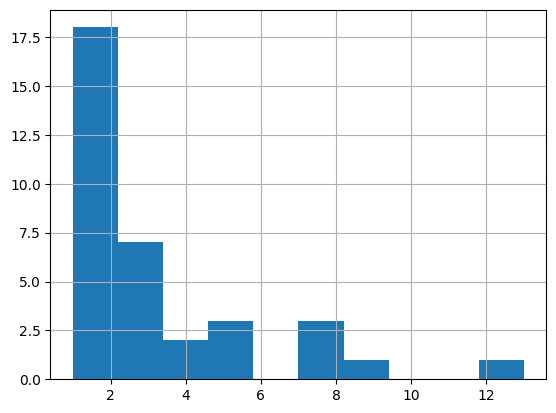

In [5]:
pd.Series([v for k, v in sorted(G.degree, key=lambda item: item[1], reverse=True)]).hist(bins=10)

## Visualisation

### En statique

{}

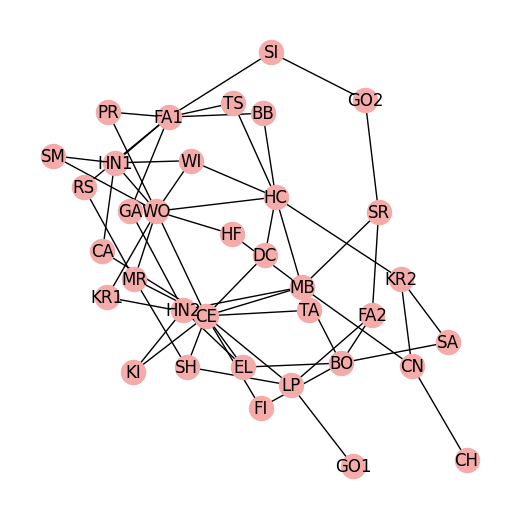

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
node_position = nx.spring_layout(G)
nx.draw(G, node_position, node_color="#F4ABAA", with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, 
                node_position, 
                edge_labels=edge_labels)

### En interactif avec Sigma

Et calcul du clustering avec l'algorithme de Louvain

In [27]:
S = Sigma(G, node_size=G.degree, node_metrics=["louvain"], 
      node_color="louvain",
      # default_edge_type="curve", node_border_color_from="node", label_font="cursive"
      )
S

Sigma(nx.Graph with 35 nodes and 61 edges)

TypeError: Sigma.write_html() missing 1 required positional argument: 'graph'

## Calcul des centralités

In [8]:
# Calcul des centralités
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank = nx.pagerank(G)

# Création d’un DataFrame pour regrouper les résultats
df_centrality = pd.DataFrame({
    "degree": degree_centrality,
    "betweenness": betweenness_centrality,
    "closeness": closeness_centrality,
    "eigenvector": eigenvector_centrality,
    "pagerank": pagerank
})

# Affichage des résultats
df_centrality = df_centrality.sort_values(by="betweenness", ascending=False)
print(df_centrality.head())

       degree  betweenness  closeness  eigenvector  pagerank
CE   0.382353     0.361194   0.531250     0.496114  0.094259
MB   0.235294     0.260771   0.507463     0.310895  0.060380
WO   0.264706     0.188262   0.478873     0.348401  0.065625
HC   0.205882     0.175784   0.453333     0.230437  0.053392
FA1  0.205882     0.109165   0.373626     0.110407  0.056694


Comparer directement dans des graphiques

In [30]:
nx.set_node_attributes(G, degree_centrality, "degree")
nx.set_node_attributes(G, betweenness_centrality, "betweenness")
nx.set_node_attributes(G, closeness_centrality, "closeness")
S = SigmaGrid(G, views=[
    {"node_size": "betweenness"},
    {"node_size": "closeness"}
    ])
S